In [1]:
import pandas

In [2]:
df=pandas.read_csv('wells1.csv')
df[State]

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


NameError: name 'State' is not defined

In [3]:
df['State']

0         WA
1         WA
2         WA
3         WA
4         WA
5         WA
6         WA
7         WA
8         WA
9         WA
10        WA
11        WA
12        WA
13        WA
14        WA
15        WA
16        WA
17        WA
18        WA
19        WA
20        WA
21        WA
22        WA
23        WA
24        WA
25        WA
26        WA
27        WA
28        WA
29        WA
          ..
353854    NM
353855    NM
353856    NM
353857    NM
353858    NM
353859    NM
353860    NM
353861    NM
353862    NM
353863    NM
353864    NM
353865    NM
353866    NM
353867    NM
353868    NM
353869    NM
353870    NM
353871    NM
353872    NM
353873    NM
353874    NM
353875    NM
353876    NM
353877    NM
353878    NM
353879    NM
353880    NM
353881    NM
353882    NM
353883    NM
Name: State, Length: 353884, dtype: object

In [5]:
df.dtypes

State         object
Well_Name     object
Operator      object
Type          object
Status        object
Slant         object
Spud Date     object
Longitude    float64
Latitude     float64
API           object
dtype: object

In [7]:
state_df=df.State

In [11]:
state_df.head()

0    WA
1    WA
2    WA
3    WA
4    WA
Name: State, dtype: object

In [12]:
subset_df=df[['State','API','Longitude','Latitude']]

In [13]:
subset_df.head()

,State,API,Longitude,Latitude
0,WA,046-027-00074,-123.64427,46.99666
1,WA,046-031-00001,-124.58319,47.87892
2,WA,046-009-00040,-124.60347,47.89009
3,WA,046-009-00008,-124.52247,48.03229
4,WA,046-009-00005,-124.48695,47.91815


In [19]:
subset_df=df.loc[[678,2341,990]]

In [20]:
subset_df

,State,Well_Name,Operator,Type,Status,Slant,Spud Date,Longitude,Latitude,API
678,WA,Donellan No. 1,North Pacific Natural Gas Co.,NaN,Drilled,NaN,1/1/1931,-119.577960,46.401470,046-005-00028
2341,CA,Honker Farms 2,Vintage Production California LLC,Dry Gas,Active,NaN,8/18/1974,-121.893590,38.067670,9520221
990,OR,LF 12B-35-65,NW Natural,Producer,Permitted,NaN,NaN,-123.277168,45.963562,36-009-00301


In [18]:
df.ix[[345,876,8765]]

,State,Well_Name,Operator,Type,Status,Slant,Spud Date,Longitude,Latitude,API
345,WA,SU No. 33,Washington Water Power Co.,NaN,Drilled,NaN,3/25/1967,-122.844190,46.547020,046-041-00101
876,OR,LF 12-33-75,Taylor Operating Company LLC,NaN,Unknown,NaN,NaN,-123.319572,46.049469,36-009-00091
8765,CA,3-6T1,Chevron U.S.A. Inc.,Observation,Active,NaN,6/29/1988,-120.388030,36.231090,1922852


In [27]:
for i in range(10,15):
    print i

10
11
12
13
14


In [39]:
subset_df.to_hdf("lat_lon",'juy')

D:\petra  bytes\lib\site-packages\pandas\core\generic.py:1138: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['State', 'Well_Name', 'Operator', 'Type', 'Status', 'Slant', 'Spud Date', 'API']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


[(u'psa_data', <HDF5 group "/psa_data" (2 members)>)]
[(u'well_1', <HDF5 group "/psa_data/well_1" (1 members)>), (u'well_2', <HDF5 group "/psa_data/well_2" (1 members)>)]
[(u'1234', <HDF5 dataset "1234": shape (63, 5), type "<f8">)]
[(u'2222', <HDF5 dataset "2222": shape (63, 5), type "<f8">)]


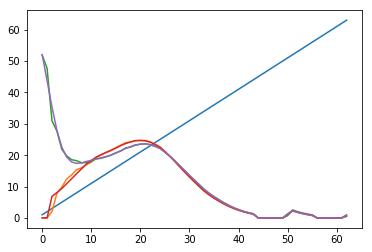

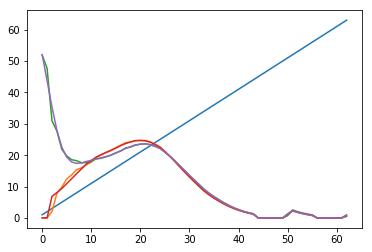

In [46]:
import h5py as hp
#i'm using h5py because,it is a Pythonic interface to the HDF5 binary data format.
import numpy as np
#i'm using numpy because,it has N-dimensional array object.
import matplotlib.pyplot as plt
#i'm using matplotlib because,it is used to plot graph
f=hp.File('Test.petrabytes',"r")
#i'm reading test.pertabytes file
k=list( f.items())
print k
#i'm looking for groups in test.pertabytes,i found psa_data
g=f.get('psa_data')
k2=list(g.items())
print k2
#i'm looking for subgroup in psa_data group,i found well_1 and well_2,first im going with well_1 data
g1=g.get('well_1')
k3=list(g1.items())
print k3
#i'm looking for datasets in well_1 group,i found 1234 dataset
data=np.array(g1.get('1234'))
plt.plot(data)
#i'm plotting data from 1234 dataset
g2=g.get('well_2')
k4=list(g2.items())
print k4
#i'm looking fordatasets in well_1 group,i found 2222 dataset
data2=np.array(g2.get('2222'))
plt.figure()
plt.plot(data2)
#i'm plotting data from 2222 dataset
f.close()
#file closed
plt.show()
#PEACE \/

In [49]:
import h5py as hp
f=hp.File('lat_lon','r')
k=list( f.items())
print k

[(u'juy', <HDF5 group "/juy" (6 members)>)]


In [55]:
import numpy as np
g1=f.get('juy')
k2=list(g1.items())
print g1

<HDF5 group "/juy" (6 members)>


In [58]:
pandas.read_hdf('Test.petrabytes')

ValueError: No dataset in HDF5 file.

In [56]:
g=g1.get('juy')
k2=list(g.items())
print g

AttributeError: 'NoneType' object has no attribute 'items'